# Fixed strategy optimization

In [1]:
from fish import fish
import numpy as np
import matplotlib.pyplot as plt
from skopt import gp_minimize, gbrt_minimize
from skopt.plots import plot_objective, plot_convergence, plot_gaussian_process
from utils import simulate
from utils import plot_sim


In [2]:
env = fish()

In [3]:
# A simple agent
class some_agent:
    def __init__(self, effort):
        self.effort = effort

    def predict(self, obs, **kwargs):
        return self.effort



In [4]:


def g(x):
    agent = some_agent(x)
    def my_function(i):
        np.random.seed(i)
        df, mu = simulate(agent, env, timeseries=False)
        return mu
    # do 100 simulations at each value to reduce noise    
    results = [my_function(i) for i in range(100)]
    return -np.mean(results)



In [5]:
%%time
# look for actions between [0,1] 
res = gp_minimize(g, [(0, 1.0)], n_calls = 20, verbose=True, n_jobs=-1)
res.fun, res.x

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.7243
Function value obtained: 224.1739
Current minimum: 224.1739
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 6.4070
Function value obtained: -31.1369
Current minimum: -31.1369
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 6.4053
Function value obtained: 10.9369
Current minimum: -31.1369
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 6.4091
Function value obtained: 10.8209
Current minimum: -31.1369
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 6.3745
Function value obtained: 10.8049
Current minimum: -31.1369
Iteration No: 6 st

(-31.444279189646153, [0.12591220390177837])

29.36635961287165


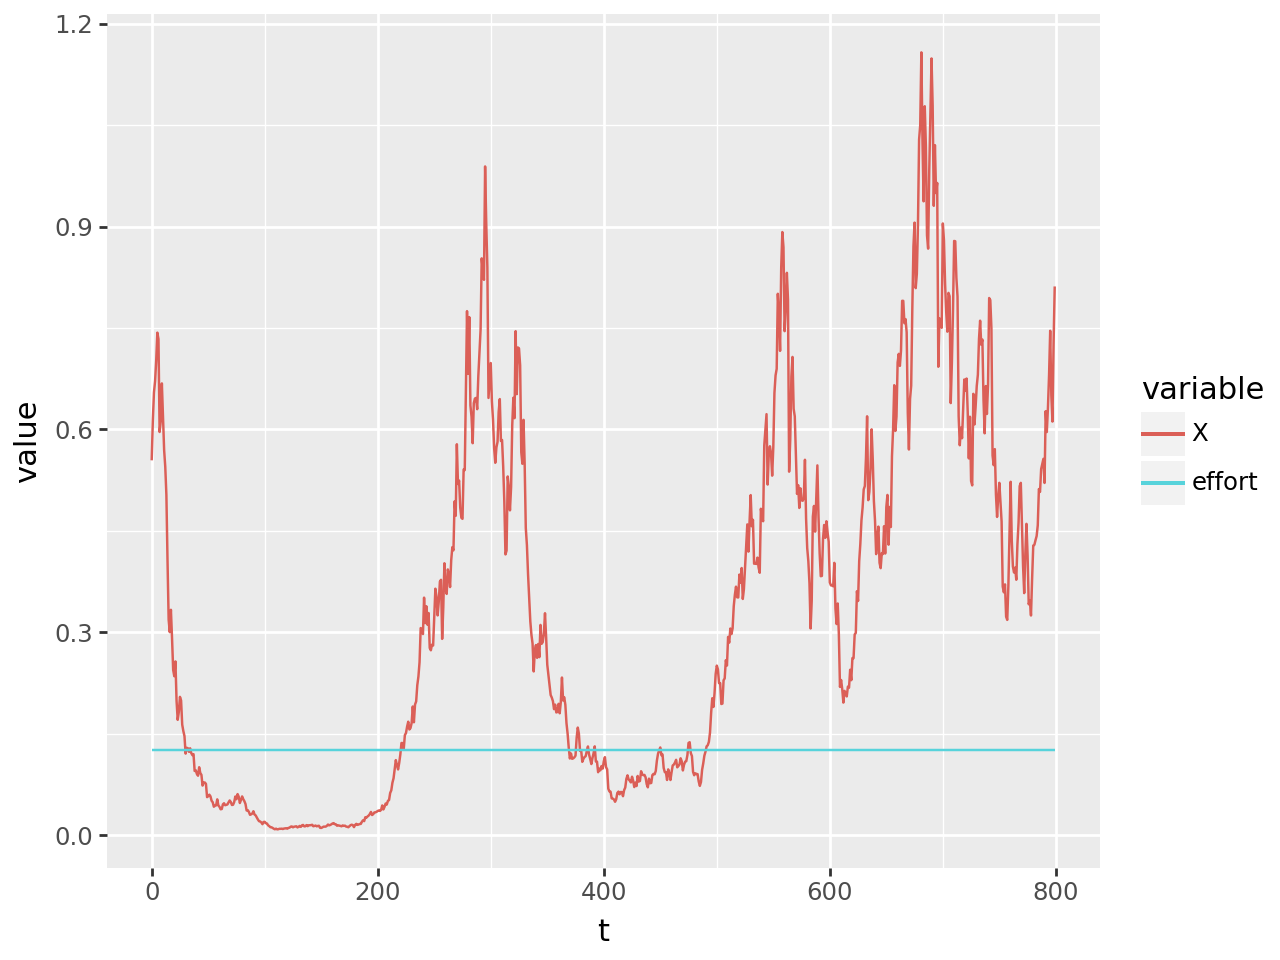

In [6]:

agent = some_agent(*res.x)
df, mu = simulate(agent, env)
print(mu)
plot_sim(df)

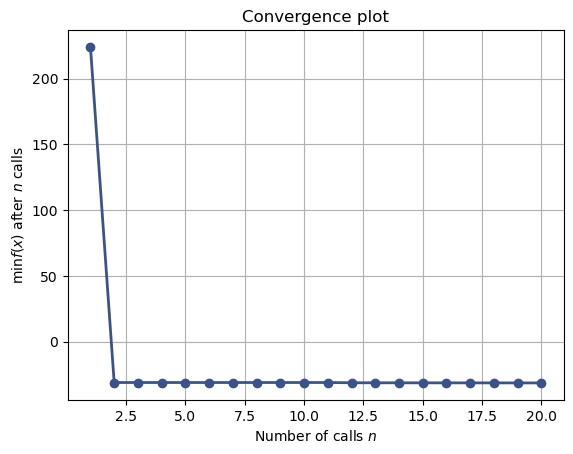

In [7]:

ax2 = plot_convergence(res)

plt.show()

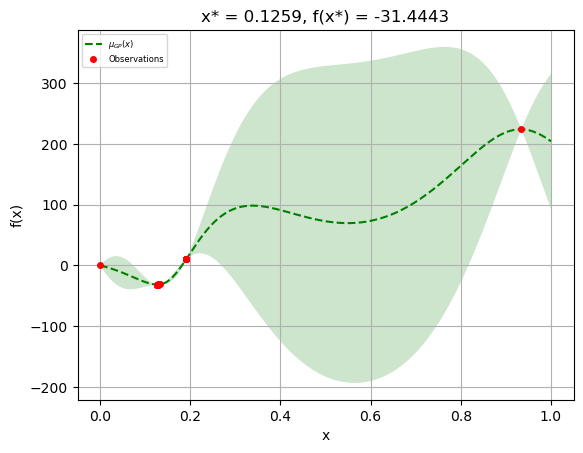

In [8]:

ax2 = plot_gaussian_process(res)

plt.show()

In [9]:
import numpy as np
# A simple agent
class reed:
    def __init__(self, a):
        self.escapement = a
        self.q0 = 0.9

    def predict(self, obs, **kwargs):
        if obs < self.escapement:
            return 0
        # escapement = obs - obs*effort*q0
        effort = (obs - self.escapement ) / (obs * self.q0 )
        return effort




53.76236705538168


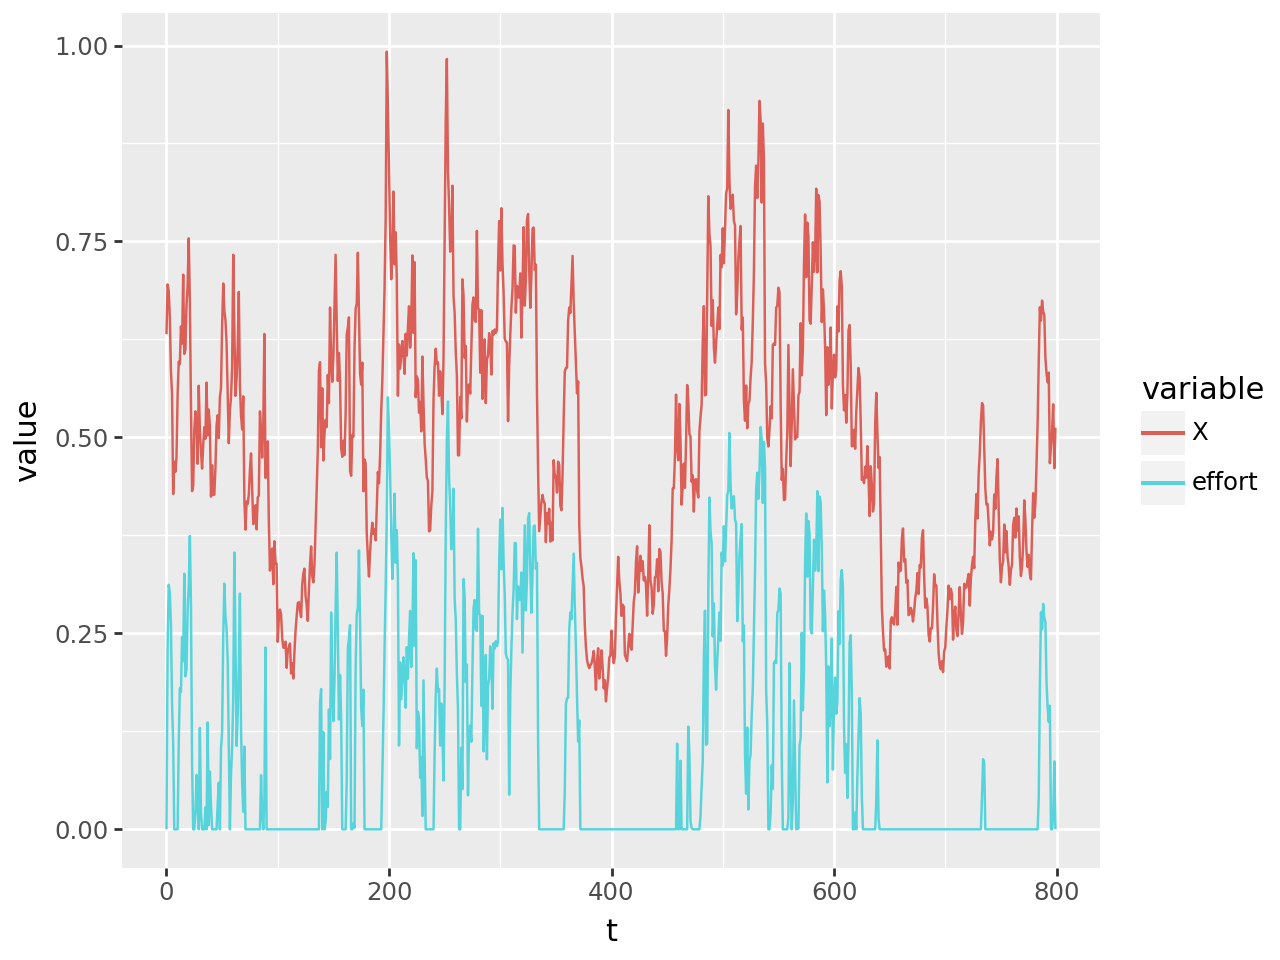

In [10]:

agent = reed(0.5)
df, mu = simulate(agent, env)
print(mu)
plot_sim(df)


In [11]:
%%time


def g(x):
    agent = reed(x)
    def my_function(i):
        np.random.seed(i)
        df, mu = simulate(agent, env, timeseries=False)
        return mu
        
    results = [my_function(i) for i in range(100)]
    return -np.mean(results)

# look for actions between [-1,1] for each species.
res = gp_minimize(g, [(0, 1.0)], n_calls = 25, verbose=True, n_jobs=-1)
res.fun, res.x

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 6.8302
Function value obtained: -43.3974
Current minimum: -43.3974
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 6.8429
Function value obtained: -35.8003
Current minimum: -43.3974
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 6.8245
Function value obtained: -35.8114
Current minimum: -43.3974
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 6.7387
Function value obtained: -35.8226
Current minimum: -43.3974
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 6.7205
Function value obtained: -35.8338
Current minimum: -43.3974
Iteration No: 6

(-43.93303913024806, [0.4111708356727852])

42.87775645650431


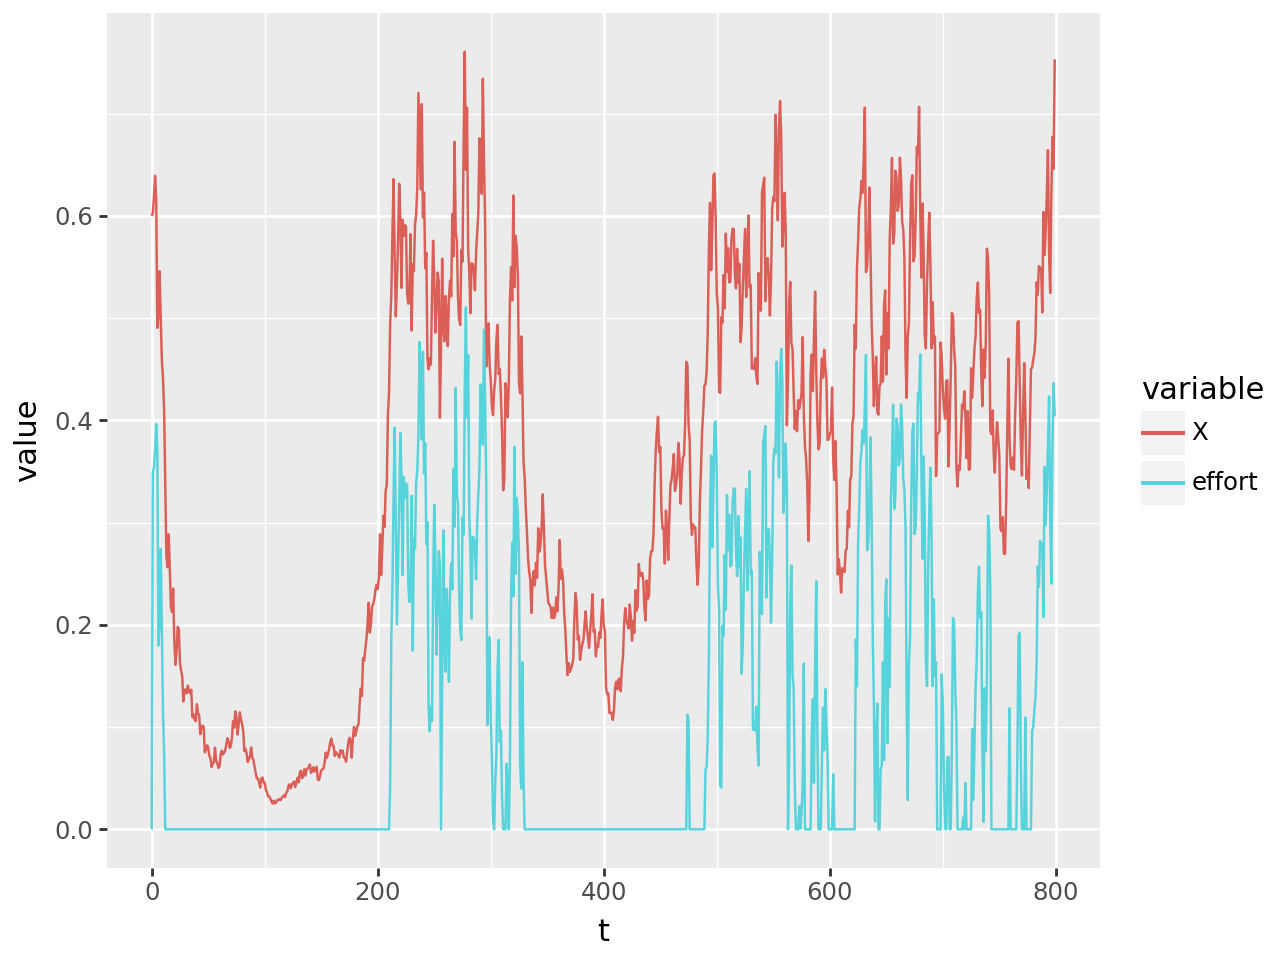

In [12]:

agent = reed(*res.x)
df, mu = simulate(agent, env)
print(mu)
plot_sim(df)


In [13]:
g(*res.x)

-44.00532537677541

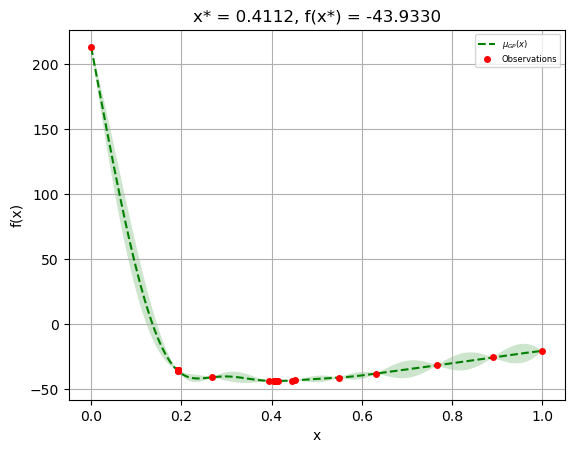

In [14]:

ax2 = plot_gaussian_process(res)

plt.show()